In [8]:
from osgeo import ogr, gdal, osr
import pandas as pd
import shapely.wkt
import fiona
import json
import os
import base64
import numpy as np
from pathlib import Path
import boto3
from datacube import Datacube
from datacube.utils.geometry import CRS, Geometry, GeoBox
from datacube.testutils.io import native_geobox, native_load
from datacube.utils.dask import start_local_dask
import rioxarray as rioxr
import awswrangler as wr
from datetime import timedelta, datetime
import dask.dataframe as dd

from datacube.utils.masking import make_mask

s3_obj = boto3.client('s3')

In [9]:
dc = Datacube()

In [3]:
ls9_polygons = np.genfromtxt("ls9_underfly_ls8.txt", dtype=str)

In [185]:
# ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/test/ls9_wo/ga_ls_wo_3/1-6-0/091/072/2021/11/",
#                                   suffix=[".json"])

# ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/baseline/ga_ls9c_ard_3/"+
#                                   a[0][:3]+"/"+a[0][3:], suffix=[".json"]")
                                  
                                

In [186]:
ls9_datasets

['s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/091/076/2021/11/11/ga_ls_fc_3_091076_2021-11-11_interim.stac-item.json',
 's3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/091/076/2021/11/16/ga_ls_fc_3_091076_2021-11-16_interim.stac-item.json',
 's3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/091/076/2021/11/21/ga_ls_fc_3_091076_2021-11-21_interim.stac-item.json']

In [7]:
s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev',
                                 Key=ls9_datasets[1].removeprefix("s3://dea-public-data-dev/"))
s3_clientdata = s3_clientobj['Body'].read().decode('utf-8')

In [19]:

# re_list = {}
# ls8_matching = []
# ls9_matching = []
# not_matching_lst = []

# for a in ls9_polygons:       
#     ls9_datasets = wr.s3.list_objects("s3://dea-public-data/baseline/ga_ls9c_ard_3/"+
#                                       a[0][:3]+"/"+a[0][3:], suffix=[".json"])                        
#     for d in ls9_datasets:        
#         s3_clientobj = s3_obj.get_object(Bucket='dea-public-data',
#                                      Key=d.removeprefix("s3://dea-public-data/"))
#         s3_clientdata = s3_clientobj['Body'].read().decode('utf-8') 
#         ls9_time = json.loads(s3_clientdata)["properties"]["datetime"]
#         ls9_time = datetime.fromisoformat(ls9_time.rstrip('Z') + "+00:00")   
#         query_poly = Geometry(json.loads(s3_clientdata)["geometry"], crs="4326")
#         ls8_query = {}
#         ls8_query["geopolygon"] = query_poly
#         if ls9_time > datetime.fromisoformat('2021-12-01T23:59:59+00:00'):
#             continue
#         ls9_crs = json.loads(s3_clientdata)["properties"]["proj:epsg"]                    
#         ls8_query['time'] = (ls9_time-timedelta(days=1),
#                          ls9_time+timedelta(days=1))
#         ls8_datasets = dc.find_datasets(product='ga_ls8c_ard_3', **ls8_query)         
#         ls8_datasets.sort(key=lambda x: x.center_time)                            
#         if ls8_datasets == []:
#             continue
#         else:                       
#             non_matching = [ds for ds in ls8_datasets if ds.crs != CRS(str(ls9_crs))]
#             not_matching_lst.extend(non_matching)
           
#             ls8_datasets = [str(ds.id) for ds in ls8_datasets if ds.crs == CRS(str(ls9_crs))]
#             ls8_matching.extend(ls8_datasets)
#             if ls8_datasets:
#                 ls9_matching.append(json.loads(s3_clientdata).get("id"))
#                 print(f"LS9 {json.loads(s3_clientdata).get('id')} matches LS8: {ls8_datasets}")
#         break
                    

In [244]:
# from dea_tools.plotting import display_map, rgb
# rgb_bands = ['red', 'green', 'blue']
# dsp_9 = dc.load(product='ga_ls9c_ard_3', id='4234113f-5883-4d87-9865-b9816a3c3983', measurements=rgb_bands)
# rgb(dsp_9, bands=rgb_bands, index=0)

In [245]:
# dsp_8 = dc.load(product='ga_ls8c_ard_3', id='8327fd6d-16f7-4db9-977f-98de5795e142', measurements=rgb_bands)
# rgb(dsp_8, bands=rgb_bands, index=0)

In [71]:
ls9_datasets = wr.s3.list_objects("", suffix=[".json"])                                       

In [72]:
len(ls9_datasets)

164

In [3]:
ls9_ard_scenes = list(filter(lambda x: '2021-11' in x, ls9_datasets))

In [4]:
from pathlib import Path

wofs_files = []

for f in ls9_ard_scenes:    
    wofs_files.append(Path(f).name.replace('wo', 'fc'))

In [8]:
path = '/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/ls9_2021_peocessed.txt'

ls9_fc_2021_processed = []
with open(path, "r") as file:
    # Read the file content into a list
    ids = file.readlines()
    
for item in ids:        
    ls9_fc_2021_processed.append(Path(item.rstrip('\n')).name)

In [10]:
len(ls9_fc_2021_processed)

164

In [11]:
set(wofs_files) - set(ls9_fc_2021_processed) 

set()

In [12]:
ls9_nov_scene_ids = []

for d in ls9_ard_scenes:
    s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev', Key=d.removeprefix("s3://dea-public-data-dev/"))
    ls9_scene_id = json.loads(s3_clientobj['Body'].read().decode('utf-8'))['properties']['odc:lineage']['ard']
    ls9_nov_scene_ids.append(ls9_scene_id)    

NameError: name 's3_obj' is not defined

In [7]:
with open('ls9_nov_scenes_ids_all.txt', "w") as file:
    # Write each item to the file followed by a newline character
    for item in ls9_nov_scene_ids:        
        file.write(item[0] + "\n")

In [40]:
def decode_credentials(encoded_file):
    with open(encoded_file, 'rb') as f:
        encoded_data = f.read()
        decoded_data = base64.b64decode(encoded_data)
        decoded_credentials = decoded_data.decode('utf-8').split(':')        
        # Assuming format of the file is:
        # access_key_id
        # secret_access_key
        access_key_id = decoded_credentials[0]
        secret_access_key = decoded_credentials[1]
      
        return access_key_id, secret_access_key

## Upload data to S3

In [3]:
# def upload_to_s3(local_path, bucket_name, s3_prefix='', extensions=['.tif', '.jpg','.yaml', '.sha1', '.json']):
#     access_key_id, secret_access_key = decode_credentials('/home/jovyan/aws.txt')
#     # Use the decoded credentials to configure boto3
#     s3 = boto3.client(
#         's3',
#         aws_access_key_id=access_key_id,
#         aws_secret_access_key=secret_access_key
#     )

#     for root, dirs, files in os.walk(local_path):   
#         for file in files:      
#             if Path(file).suffix in extensions and root.find('pynb_checkpoints') == -1:
#                 local_file_path = os.path.join(root, file)                            
#                 s3_file_key = os.path.join(s3_prefix, local_file_path.replace("/gdata1/projects/landcover/fractional-cover-model/", ""))                
#                 s3.upload_file(local_file_path, bucket_name, s3_file_key)
#                 print(f"Uploaded {local_file_path} to s3://{bucket_name}/{s3_file_key}")
                            
# # Example usage
# local_path = '/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/'
# bucket_name = 'dea-public-data-dev'
# s3_prefix = 'test/ls9_fc/'

# upload_to_s3(local_path, bucket_name, s3_prefix)

In [17]:
cmds = []

with open("/home/jovyan/dea-notebooks/Scientific_workflows/LS9_FC/ls9_nov_scene_ids_2.txt", "r") as file:
    # Read the file content into a list
    ids = file.readlines()
    
for idx in ids:
    idx = idx.rstrip('\n')
    cmds.append(f'datacube-alchemist run-one -u {idx} -c /home/jovyan/ls9_fc_config.yaml')


In [23]:
len(cmds)

105

In [18]:
# len(ls9_nov_scene_ids)

## Run FC

In [4]:
# import multiprocessing
# import subprocess

# def run_command(command):
#     """Function to run a bash command."""
#     subprocess.run(command, shell=True)
#     print(command)
#     print("")
    

# # Create a list of commands (you can add more commands if needed)
# num_cpus = multiprocessing.cpu_count()
# print(num_cpus)

# # Create a multiprocessing pool with the number of CPUs
# with multiprocessing.Pool(processes=10) as pool:
#     # Execute the commands using the pool
#     results = pool.map_async(run_command, cmds)

#     # Wait for all tasks to finish
#     results.wait()

#     # Check if all tasks have been completed
#     if results.ready():
#         print("All tasks have been completed.")

In [10]:
ls9_polygons = np.genfromtxt("ls9_underfly_ls8.txt", dtype=str)

In [11]:
def native_load_dss(dss, base_ds, measurements=None):
    geobox = native_geobox(
            base_ds, basis=list(dss[0].measurements.keys())[0]
        )
    mm = dss[0].type.lookup_measurements(measurements)
    tmp_data = dc.load_data(dc.group_datasets(dss, 'time'),
                    geobox, measurements=mm, dask_chunks={'time': 1, 'x': -1, 'y': -1})
        
    return tmp_data

In [12]:
sea_pathrows = '113072', '113074', '113083', '091072', '091075', '094071', '094072'
ls9_polygons_no_sea = [] 

for ply in ls9_polygons:
    if not ply[0] in sea_pathrows:        
        ls9_polygons_no_sea.append(ply)
    else:
        print(" dropping", ply[0])

 dropping 113072
 dropping 113074
 dropping 113083
 dropping 091072
 dropping 091075
 dropping 094071
 dropping 094072


In [13]:
ls9_polygons_no_sea[0]

array(['113073', '117.218', '-19.674', '119.3', '-17.9043'], dtype='<U8')

In [15]:
import geopandas as gpd
from rasterio.mask import mask

au_shape = 'aus_map/cstauscd_r_3577.shp'

In [17]:
def generate_seamask(shape_file, data_shape, data_crs, orig_coords, resolution):
    """
        creak mask without oceans
        input:
            shape_file: the shape file of Australia coastline
            data_shape: the shape of loaded data to be masked upon
            orig_coords: the origin of the image for gdal to decide the transform
            resolution: pixel size with signs, e.g., (30, -30) for C3 and (25, -25) for C2
        output:
            a numpy array of mask, where valid pixels = 1
    """
    source_ds = ogr.Open(shape_file)
    source_layer = source_ds.GetLayer()
    source_layer.SetAttributeFilter("FEAT_CODE!='sea'")

    yt, xt = data_shape
    xres = resolution[0]
    yres = resolution[1]
    no_data = 0

    xcoord, ycoord = orig_coords
    geotransform = (xcoord - (xres*0.5), xres, 0, ycoord - (yres*0.5), 0, yres)

    target_ds = gdal.GetDriverByName('MEM').Create('', xt, yt, gdal.GDT_Byte)
    target_ds.SetGeoTransform(geotransform)
    albers = osr.SpatialReference()
    albers.ImportFromEPSG(int(data_crs))
    target_ds.SetProjection(albers.ExportToWkt())
    band = target_ds.GetRasterBand(1)
    band.SetNoDataValue(no_data)

    gdal.RasterizeLayer(target_ds, [1], source_layer, burn_values=[1])
    return band.ReadAsArray()

## Update the following cell to generate the diff for each fraction

In [93]:
from datacube.utils import masking
import dask.array as da
from odc.algo import enum_to_bool, erase_bad

prc_10 = []
prc_50 = []
prc_90 = []
diffs = []
nomatch_count = 0

for a in ls9_polygons_no_sea:      
    ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/"+
                                      a[0][:3]+"/"+a[0][3:], suffix=[".json"])
    for d in ls9_datasets:        
        s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev',
                                     Key=d.removeprefix("s3://dea-public-data-dev/"))
        s3_clientdata = s3_clientobj['Body'].read().decode('utf-8')
        
        for band in ['pv']:
            load_path = json.loads(s3_clientdata)["assets"][band]['href']                                       
            ls9_time = json.loads(s3_clientdata)["properties"]["datetime"]
            ls9_time = datetime.fromisoformat(ls9_time.rstrip('Z') + "+00:00")
            
            query_poly = Geometry(json.loads(s3_clientdata)["geometry"], crs="4326") 
            ls9_query ={}
            ls9_query["geopolygon"] = query_poly
            ls9_query['time'] = ls9_time            
            
            ls9_ard_dataset_id = json.loads(s3_clientdata)["properties"]['odc:lineage']['ard']
            ls9_ard_dataset = dc.find_datasets(product='ga_ls9c_ard_3', id=ls9_ard_dataset_id)                        
            ls9_ard_data = native_load_dss(ls9_ard_dataset, ls9_ard_dataset[0], measurements=['fmask'])                           
            ls9_wofs_dataset = dc.find_datasets(product='ga_ls_wo_3', platform='landsat-9', **ls9_query)                                      
            
            ls8_query = {}                      
            ls8_query["geopolygon"] = query_poly                       
            if ls9_time > datetime.fromisoformat('2021-12-01T23:59:59+00:00'):
                continue
            ls9_crs = json.loads(s3_clientdata)["properties"]["proj:epsg"]                                                    
            
            ls8_query['time'] = (ls9_time-timedelta(days=1),
                             ls9_time+timedelta(days=1))
            ls8_datasets = dc.find_datasets(product='ga_ls_fc_3', platform="landsat-8", **ls8_query)      
            ls8_ard_datasets = dc.find_datasets(product='ga_ls8c_ard_3', **ls8_query)      
            ls8_wofs_datasets = dc.find_datasets(product='ga_ls_wo_3', platform="landsat-8", **ls8_query)   
                          
            ls8_datasets.sort(key=lambda x: x.center_time)            
            ls8_ard_datasets.sort(key=lambda x: x.center_time)
            ls8_wofs_datasets.sort(key=lambda x: x.center_time)
            
            if ls8_datasets == []:
                nomatch_count += 1    
                continue
            else:                    
                ls9_data = rioxr.open_rasterio(load_path)                                                                 
                ls9_clear_mask = make_mask(ls9_ard_data.isel(time=0).fmask, fmask="valid")                                
                ls9_data = ls9_data.where(ls9_clear_mask)                                     
                
                if ls9_wofs_dataset:
                    ls9_wofs_data = native_load_dss(ls9_wofs_dataset, ls9_wofs_dataset[0], measurements=['water'])               
                    ls9_wet_mask =  (ls9_wofs_data.isel(time=0)["water"] & ~(1 << 4)) == 128
                    ls9_data = ls9_data.where(~ls9_wet_mask)                                                           

                ls9_sea_mask = generate_seamask(au_shape, (ls9_data.shape[1], ls9_data.shape[2]), ls9_crs,
                                  (ls9_data.x.data.min(), ls9_data.y.data.max()), (30, -30))                                         
                ls9_data = ls9_data.where(ls9_sea_mask == 1)                                                                            

                non_matching = [ds for ds in ls8_datasets if ds.crs != CRS(str(ls9_crs))]         
                ls8_datasets = [ds for ds in ls8_datasets if ds.crs == CRS(str(ls9_crs))]                
                ls8_ard_datasets = [ds for ds in ls8_ard_datasets if ds.crs == CRS(str(ls9_crs))] 
                ls8_wofs_datasets = [ds for ds in ls8_wofs_datasets if ds.crs == CRS(str(ls9_crs))]

                ls9_diff = []                
                for ds, ds_ard, ds_wofs in zip(ls8_datasets, ls8_ard_datasets, ls8_wofs_datasets):                    
                    ls8_data = native_load_dss([ds], ds, measurements=[band])         

                    ls8_ard_data = native_load_dss([ds_ard], ds_ard, measurements=['fmask'])    
                    ls8_clear_mask = make_mask(ls8_ard_data.isel(time=0).fmask, fmask="valid")                                
                    ls8_data = ls8_data.where(ls8_clear_mask) 


                    ls8_wofs_data = native_load_dss([ds_wofs], ds_wofs, measurements=['water'])                                                         
                    ls8_wet_mask =  (ls8_wofs_data.isel(time=0)["water"] & ~(1 << 4)) == 128
                    ls8_data = ls8_data.where(~ls8_wet_mask)     

                    ls8_sea_mask = generate_seamask(au_shape, (ls8_data.dims['y'], ls8_data.dims['x']), ls8_ard_data.crs.split(":")[1],
                                  (ls8_data.x.data.min(), ls8_data.y.data.max()), (30, -30)) 


                    ls8_data = ls8_data.where(ls8_sea_mask == 1)                                             

                    ls8_band_data = ls8_data[band][0].where(ls8_data[band] != 255).isel(time=0)                                        
                    ls9_band_data = ls9_data[0].where(ls9_data[0] != 255)
                    intersect_region = ls8_band_data - ls9_band_data

                    ls9_intersect = ls9_band_data.sel(x=intersect_region.x, y=intersect_region.y).data                       
                    ls8_intersect = ls8_band_data.sel(x=intersect_region.x, y=intersect_region.y).data                                

                    diff = ls9_intersect.reshape(-1) - ls8_intersect.reshape(-1)                     
                    ls9_diff.extend(diff.compute())                 

                if ls9_diff:    
                    prc_10.append(np.nanpercentile(ls9_diff, 10))
                    prc_50.append(np.nanpercentile(ls9_diff, 50))
                    prc_90.append(np.nanpercentile(ls9_diff, 90)) 
                    diffs.extend(ls9_diff)
                    print("Ls9 - LS8 ", a[0], np.nanmean(ls9_diff))
print("No match count ", nomatch_count)               

/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/tmp/ipykernel_634/1373382975.py:106: RuntimeWarning: Mean of empty slice
  print("Ls9 - LS8 ", a[0], np.nanmean(ls9_diff))


Ls9 - LS8  113073 nan
Ls9 - LS8  113078 -1.5046406
Ls9 - LS8  113079 -1.7443924
Ls9 - LS8  113080 -1.8999301
Ls9 - LS8  113081 -1.4308261
Ls9 - LS8  113082 -1.0851966


/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/tmp/ipykernel_634/1373382975.py:106: RuntimeWarning: Mean of empty slice
  print("Ls9 - LS8 ", a[0], np.nanmean(ls9_diff))


Ls9 - LS8  091073 nan
Ls9 - LS8  091074 -10.635594
Ls9 - LS8  091076 0.28962702
Ls9 - LS8  091077 0.5018201
Ls9 - LS8  091078 -0.44226095
Ls9 - LS8  091079 -1.6017804
Ls9 - LS8  091080 -1.6012309
Ls9 - LS8  091081 -1.2316732
Ls9 - LS8  091082 -1.12885
Ls9 - LS8  091083 -0.90583163
Ls9 - LS8  091084 -0.91452706
Ls9 - LS8  091085 -0.0017691631
Ls9 - LS8  094076 -1.339898
Ls9 - LS8  094077 -1.1110053
Ls9 - LS8  094078 -1.2618834
Ls9 - LS8  094079 -1.9349742
Ls9 - LS8  094080 -1.8637115
Ls9 - LS8  094081 -1.7906526
Ls9 - LS8  094082 -1.5431184
Ls9 - LS8  094083 -1.8557203
No match count  71


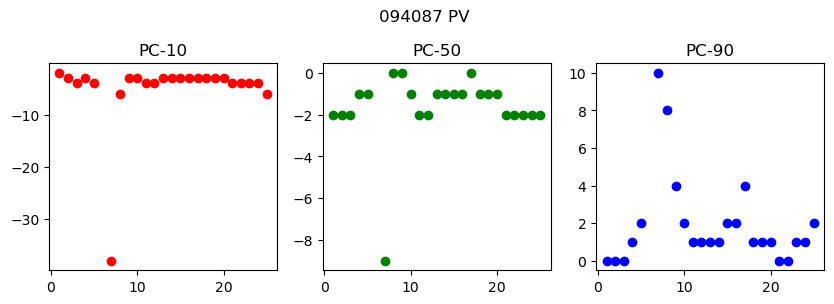

In [95]:
import matplotlib.pyplot as plt 

plot_percentile(band, 1, prc_10, prc_50, prc_90)

In [88]:
def plot_percentile(band, n, prc_10, prc_50, prc_90):
    plt.figure(figsize=(10, 3))

    x_values = np.arange(len(prc_10))
    plt.subplot(n, 3, 1)
    plt.plot(x_values, prc_10, 'ro', label=f'PC-10 {band}')
    plt.title('PC-10')

    x_values = np.arange(len(prc_50))
    plt.subplot(n, 3, 2)
    plt.plot(x_values, prc_50, 'go', label=f'PC-50 {band}')
    plt.title('PC-50')

    x_values = np.arange(len(prc_90))
    plt.subplot(n, 3, 3)
    plt.plot(x_values, prc_90, 'bo', label=f'PC-90 {band}')    
    plt.title('PC-90')    
    plt.subplots_adjust(top=0.8)
    
    plt.suptitle(f'{a[0]} PV')
    # plt.savefig(f'{a[0]}_PV.png')

    plt.show()
    